# Machine Learning NLP notebook for idenitfying ML methods papers in life science jorunal 
## 1. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gavinfarrell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/gavinfarrell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/gavinfarrell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/gavinfarrell/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gavinfarrell/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


TF Matrix Shape: (186, 4813)
IDF Shape: (4813,)
TF-IDF Matrix Shape: (186, 4813)
BoW Matrix Shape: (186, 4813)
Word2Vec Model Vocabulary Size: 4830
Vector for 'machine': [-0.2444485   0.26538575  0.1789455   0.06959072  0.04581644 -0.64311445
  0.17867923  0.6474995  -0.28289267 -0.26393676 -0.18114334 -0.52770805
 -0.06296773  0.05251756 -0.05129006 -0.15459938  0.08666618 -0.45095924
 -0.02716797 -0.61237603  0.08900177  0.21916926  0.28724846 -0.14712232
 -0.13273783 -0.06121671 -0.2895383  -0.23713247 -0.31229138 -0.01782243
  0.5094643   0.12942828  0.06203793 -0.21894997 -0.0762275   0.36566538
  0.10754098 -0.3429777  -0.2141638  -0.6127629   0.1376352  -0.34317964
 -0.23588252 -0.095607    0.33195865 -0.07588113 -0.30792505 -0.02417998
  0.16030577  0.2573497   0.23346955 -0.14894027 -0.1175324   0.04028307
 -0.26123112  0.24585937  0.2006422  -0.05799405 -0.33893123  0.06178541
 -0.00204284  0.13212706 -0.08894027  0.06697901 -0.40105072  0.19112834
  0.04493122  0.10762941 -0

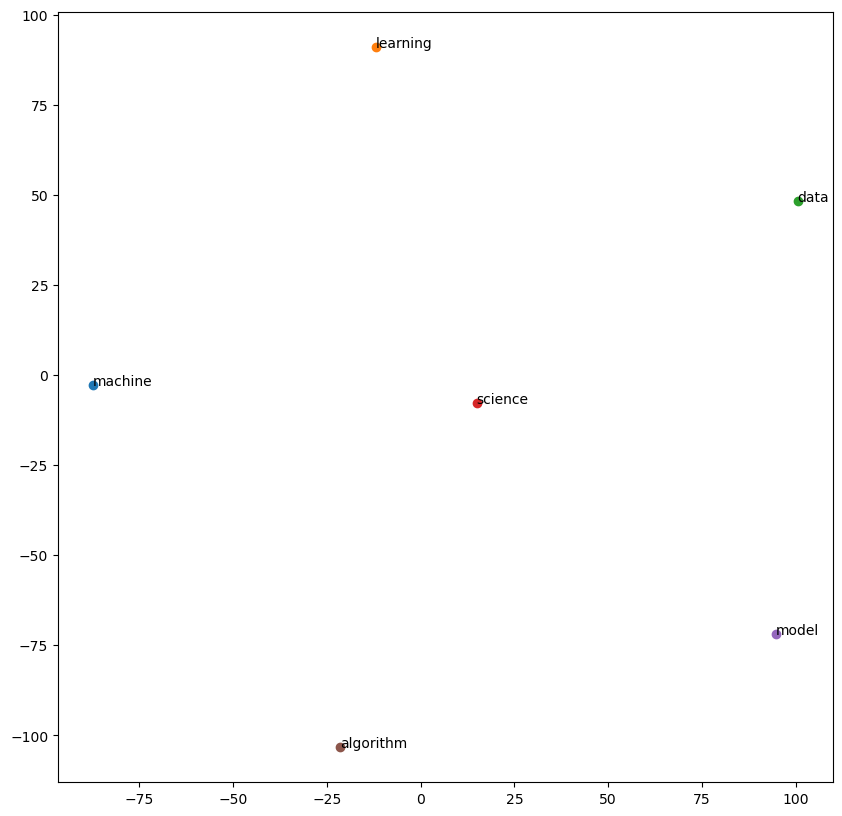

In [14]:
# 1. Preprocess DOME data & get insights from the literature data for use with developing ML lit triage model 

# 1A. DOME abstract and title

# 1. Import Necessary Libraries 
# # Ensures that all required NLP libraries (NLTK, SpaCy, Scikit-learn, etc.) are available.  
import pandas as pd
import numpy as np
import re
import nltk
import sklearn
import os
from os import listdir
from os.path import isfile, join
# import spacy - depedncy issues avoid for now 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#nltk.download('punkt')
#nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Download required datasets
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
import scipy.sparse
import joblib

# 2. Load Data
# Load the DOME abstract and title data
# Read in names of PMC files in title and abstract folder + put into variable 
title_abstract_names = os.listdir('./DOME_Registry_PMC_Title_Abstract')
# Read in the text from each file and put into a new list
title_abstract_names_list = []
for file in title_abstract_names:
    with open('./DOME_Registry_PMC_Title_Abstract/' + file, 'r') as f:
        title_abstract_names_list.append(f.read())
        
# 2. Text Cleaning & Normalization  
# 2.1 Lowercasing to enable case-insensitive matching.  
def lowercasing(text):
    return text.lower()

clean1_title_abstract = []
for title_abstract in title_abstract_names_list:
    clean1_title_abstract.append(lowercasing(title_abstract))

# print(lower_title_abstract[4])

# 2.2 Remove Special Characters & Numbers --> do not do for full text
def remove_special_chars_numbers(text):
    # Remove numbers and special characters, keeping only letters and spaces
    cleaned_text = re.sub(r'[^A-Za-z\s]', ' ', text)
    return cleaned_text

clean2_title_abstract = []
for title_abstract in clean1_title_abstract:
    clean2_title_abstract.append(remove_special_chars_numbers(title_abstract))
    
#print(clean2_title_abstract[0])

# 2.3 Remove double white spaces
def remove_extra_whitespace(text):
    return ' '.join(text.split())

clean3_title_abstract = []
for title_abstract in clean2_title_abstract:
    clean3_title_abstract.append(remove_extra_whitespace(title_abstract))

#print(clean3_title_abstract[0])

# 3. Tokenization & Basic Cleaning  
# 3.1 Tokenization - Splits text into individual words can also try subwords.). 
# #Tokenizer chosen also removes punctuation
clean4_title_abstract = []

for title_abstract in clean3_title_abstract:
    clean4_title_abstract.append(word_tokenize(title_abstract))

#print(clean4_title_abstract[180])

# #3.2 R (Step 1.3) → Ensures proper word separation. - ignore for the moment, address if tokenisation issues 

# 3.3 Removing Stopwords - Eliminates commonly occurring but uninformative words.  
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word not in stop_words]

clean5_title_abstract = []
for title_abstract in clean4_title_abstract:
    clean5_title_abstract.append(remove_stopwords(title_abstract))

# print(clean5_title_abstract[180])

# 4. Lemmatization (& Stemming - where would be preferred)  
# Lemmatization → Converts words to their root form.  
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

clean6_title_abstract = []
for title_abstract in clean5_title_abstract:
    clean6_title_abstract.append(lemmatize(title_abstract))

#print(clean5_title_abstract[180])
#print(clean6_title_abstract[180])

# 5. Feature Extraction (Reorganized for clarity)  
# 5.1 Part-of-Speech (POS) Tagging & Counts  


# 5.2 Named Entity Recognition (NER)  

# 5.3 Term Frequency - Inverse Document Frequency - (TF-IDF) (Step 1.6.3)  
# Try on doc basis and also on full corpus basis

# 5.3.1 Term frequency → Measures how frequently a term occurs in a document.
def compute_term_frequency(documents):
    vectorizer = CountVectorizer()
    tf_matrix = vectorizer.fit_transform(documents)
    return tf_matrix, vectorizer.get_feature_names_out()

# 5.3.2 IDF → Measures how important a term is within a corpus.
def compute_inverse_document_frequency(tf_matrix):
    transformer = TfidfTransformer(norm=None, use_idf=True)
    transformer.fit(tf_matrix)
    idf = transformer.idf_
    return idf

# 5.3.3 TF-IDF → Combines the above two metrics to determine the importance of a term in a document relative to a corpus.
def compute_tf_idf(documents):
    vectorizer = TfidfVectorizer()
    tf_idf_matrix = vectorizer.fit_transform(documents)
    return tf_idf_matrix, vectorizer.get_feature_names_out()

# Example usage:
documents = [" ".join(doc) for doc in clean6_title_abstract]
tf_matrix, terms = compute_term_frequency(documents)
idf = compute_inverse_document_frequency(tf_matrix)
tf_idf_matrix, tf_idf_terms = compute_tf_idf(documents)

print("TF Matrix Shape:", tf_matrix.shape)
print("IDF Shape:", idf.shape)
print("TF-IDF Matrix Shape:", tf_idf_matrix.shape)

# Save the matrices and terms
output_dir = './DOME_Registry_PMC_Title_Abstract_Analysis'
os.makedirs(output_dir, exist_ok=True)

# Convert sparse matrix to dense format for saving as CSV
tf_matrix_dense = tf_matrix.toarray()
tf_idf_matrix_dense = tf_idf_matrix.toarray()

# Save as CSV
pd.DataFrame(tf_matrix_dense, columns=terms).to_csv(os.path.join(output_dir, 'tf_matrix.csv'), index=False)
pd.DataFrame({'term': terms, 'idf': idf}).to_csv(os.path.join(output_dir, 'idf.csv'), index=False)
pd.DataFrame(tf_idf_matrix_dense, columns=tf_idf_terms).to_csv(os.path.join(output_dir, 'tf_idf_matrix.csv'), index=False)

# 5.4 Bag of Words (BoW)
def compute_bag_of_words(documents):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(documents)
    return bow_matrix, vectorizer.get_feature_names_out()

# BOW usage:
bow_matrix, bow_terms = compute_bag_of_words(documents)
print("BoW Matrix Shape:", bow_matrix.shape)

# Save BoW matrix as CSV
bow_matrix_dense = bow_matrix.toarray()
pd.DataFrame(bow_matrix_dense, columns=bow_terms).to_csv(os.path.join(output_dir, 'bow_matrix.csv'), index=False)

# 5.4 Word Embeddings (Word2Vec, GloVe, BERT, etc.)
def compute_word2vec_gensim(documents):
    model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Example usage:
word2vec_model = compute_word2vec_gensim(clean6_title_abstract)
print("Word2Vec Model Vocabulary Size:", len(word2vec_model.wv))

# Display the vector for a sample word
sample_word = 'machine'
if sample_word in word2vec_model.wv:
    print(f"Vector for '{sample_word}':", word2vec_model.wv[sample_word])
else:
    print(f"'{sample_word}' not in vocabulary")

# Visualize Word2Vec word clusters
def visualize_word_clusters(model, words):
    word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
    tsne = TSNE(n_components=2, random_state=0, perplexity=5)  # Set perplexity to a value less than the number of words
    word_vectors_2d = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        if word in model.wv:
            plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
            plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.show()

# Example usage:
sample_words = ['machine', 'learning', 'data', 'science', 'model', 'algorithm']
visualize_word_clusters(word2vec_model, sample_words)

# 6. Vectorization (Final Step)
# #n-Grams – Captures sequences of words. Example: Bi-gram: "machine learning" → (["machine", "learning"]).  
# ✔ TF-IDF OR Embeddings (Step 1.9) → Converts text into a numerical representation suitable for ML models.  
# (Vectorization is technically part of feature extraction, so this step can be merged with 1.6 if preferred.)

# Try title only and then abstarct only


# 1B. DOME full text 


In [ ]:
# Identify using ml ontology and others rleevant ML words not within - eg: model types etc


In [ ]:
# 2. Determine if wider corpus of ML papers needed - automatically find some papers and then also preprocess
# could dtermine using text word mining
#random papers form lit suggest or negatiev search of terms - eg noo model/ml etc 
#  

In [ ]:
# 3. Preprocess all ML papers

In [ ]:
# 4. Download all papers mentioning machine learning and AI from EPMC 

In [ ]:
# 5. Deploy ML model to predict if a paper is about ML or not

In [ ]:
# 6. Analyse top papers and journals insights from the literature data